# 2024 Guide Session 5주차 실습

In [77]:
'''1'''
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_palette('PRGn')
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [78]:
'''2'''
df_train = pd.read_csv('df_train_4.csv')
df_test = pd.read_csv('df_test_4.csv')

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,65.6344,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


## 지난 시간 복습하기

In [79]:
'''3'''
print(df_train.shape) 
print(df_test.shape) 

(891, 11)
(418, 10)


In [80]:
'''4'''
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [81]:
'''5'''
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,24.046813
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,20.481625
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,65.634400


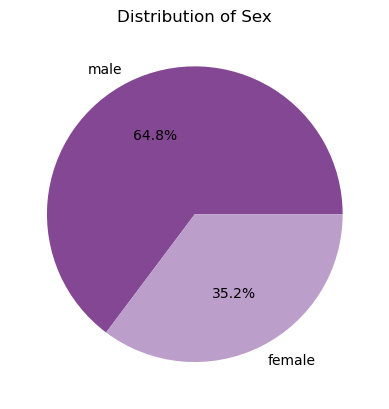

In [82]:
'''6'''
# 1. 성별 분포 시각화
sex_counts = df_train['Sex'].value_counts()
plt.pie(sex_counts, labels= sex_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.show()

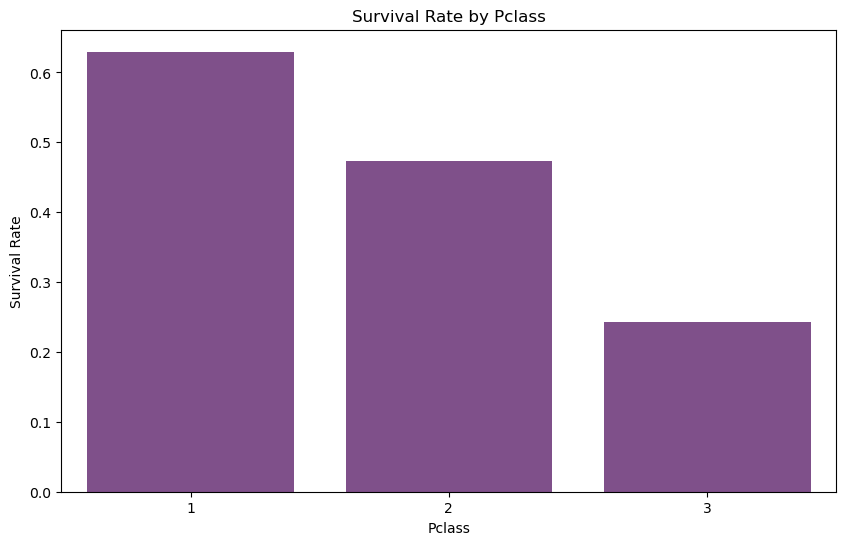

In [83]:
'''7'''
# 2. 객실 등급(Pclass)에 따른 생존율
survival_rate = df_train.groupby('Pclass')['Survived'].mean().reset_index()  
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=survival_rate)
plt.title('Survival Rate by Pclass')
plt.ylabel('Survival Rate')
plt.xlabel('Pclass')
plt.show()

## EDA 실습 & 퀴즈

<span style = "color:red"> 
Q1. 타이타닉 승객은 30대가 가장 많다. (O or X로 답해주세요.)

In [84]:
### 답 -> (X)
# 여기에 발표자를 따라서 코드를 작성하세요.

df_train_copy = df_train.copy()
Age_cat = (df_train['Age'] // 10) * 10
df_train_copy.insert(6,'Age_cat', Age_cat)

In [85]:
df_train_copy.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Age_cat,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,20,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,30,1,0,PC 17599,65.6344,C


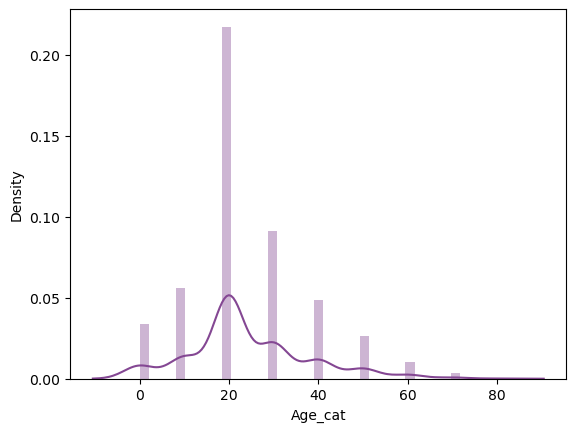

In [86]:
sns.distplot(df_train_copy['Age_cat'])
plt.show()

<span style = "color:red"> 
Q2. 3등석 객실에 가장 많은 연령대는 무엇인가요? (파이차트를 그려서 알아보세요.)

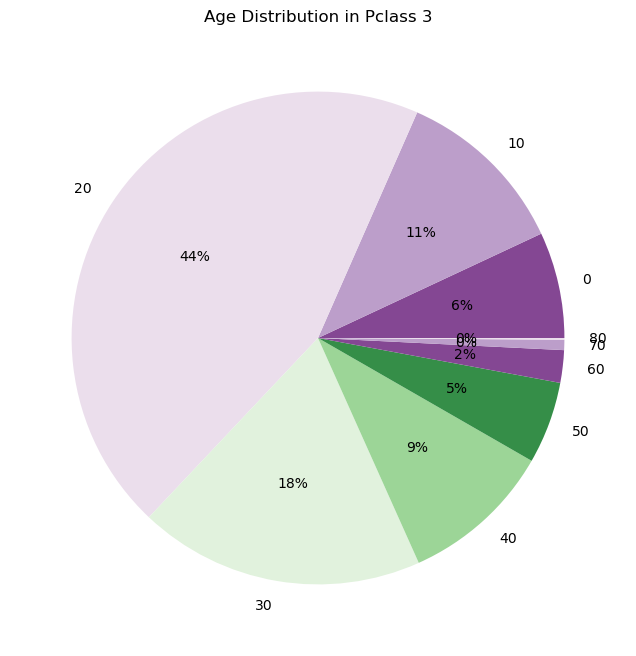

In [87]:
### 답
# 여기에 답을 작성하세요.

# 1. Pclass가 3인 데이터를 df_train_copy에서 뽑아 class_3_data에 저장하세요.
# 2. class_3_data를 위에서 만든 Age_cat 변수 별로 그룹화(groupby)하여 각 연령대에서의 횟수(size())를 구하고, age_class_3_group에 저장하세요.
# 3. age_class_3_group(연령별 횟수)을 전체 횟수의 합으로 나눠서 age_class_3_percentage에 저장하세요.

#1  
pclass3 = df_train_copy['Pclass']==3
df_train_copy.insert(1, 'class_3_data', pclass3)

#2
age_class_3_group = df_train_copy.groupby('Age_cat')['class_3_data'].size()

#3
age_class_3_percentage = age_class_3_group / age_class_3_group.sum()


# 파이 차트로 시각화
plt.figure(figsize=(8, 8))
plt.pie(age_class_3_percentage, labels=age_class_3_percentage.index, autopct='%d%%')
plt.title('Age Distribution in Pclass 3')
plt.show()

## 문자형 변수 인코딩

#### * Sex, Embarked

In [88]:
'''8'''
df_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [89]:
'''9'''
df_train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [90]:
'''10'''
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked'])
df_test = pd.get_dummies(df_test, columns=['Sex', 'Embarked'])

In [91]:
'''11'''
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,65.6344,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True


## 기본 성능 확인

In [92]:
'''12'''
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,65.6344,True,False,True,False,False


In [93]:
'''13'''
df_test.head(2)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34,0,0,330911,7.8292,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47,1,0,363272,7.0000,True,False,False,False,True


In [94]:
'''14'''
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 

In [95]:
'''15'''
X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

In [96]:
'''16'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 10)
(891, 1)
(418, 10)


In [97]:
'''17'''
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1004)

In [98]:
'''18'''
preds = model_dt.predict(X_test)

In [99]:
'''19'''
submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

In [100]:
'''20'''
submission.to_csv('base_score.csv', index=False)

In [101]:
'''21'''
score = pd.read_csv('base_score.csv')
score

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 데이콘 실습
- https://dacon.io/competitions/official/235539/overview/description

## Feature Engineering

### 1. 구간화 (Data Bining)

#### * Age

In [102]:
'''22'''
df_train['Age'].describe()

count    891.000000
mean      29.544332
std       13.013778
min        0.000000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [103]:
'''23'''
age_bins = [-1, 12, 18, 35, 50, 80]
age_labels = [1, 2, 3, 4, 5]

df_train['Age'] = pd.cut(df_train['Age'], bins=age_bins, labels=age_labels)
df_test['Age'] = pd.cut(df_test['Age'], bins=age_bins, labels=age_labels)

#### * Fare

In [104]:
'''24'''
df_train['Fare'].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64

In [105]:
'''25'''
fare_bins = [-1, 7.91, 14.45, 31, 66]
fare_labels = [1, 2, 3, 4]

df_train['Fare'] = pd.cut(df_train['Fare'], bins=fare_bins, labels=fare_labels)
df_test['Fare'] = pd.cut(df_test['Fare'], bins=fare_bins, labels=fare_labels)

In [106]:
'''26'''
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",3,1,0,A/5 21171,1,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",4,1,0,PC 17599,4,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",3,0,0,STON/O2. 3101282,2,True,False,False,False,True


In [107]:
'''27'''
df_test.head(3)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",3,0,0,330911,1,False,True,False,True,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",4,1,0,363272,1,True,False,False,False,True
2,894,2,"Myles, Mr. Thomas Francis",5,0,0,240276,2,False,True,False,True,False


In [108]:
'''28'''
# 성능 확인
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 

X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

preds = model_dt.predict(X_test)

submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

submission.to_csv('bining_score.csv', index=False)

(891, 10)
(891, 1)
(418, 10)


### 2. 피쳐 생성 (Feature Generation)

#### * Family Size 생성

In [109]:
'''29'''
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [110]:
'''30'''
# 성능 확인
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize'] 

X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

preds = model_dt.predict(X_test)

submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

submission.to_csv('FamilySize_score.csv', index=False)

(891, 11)
(891, 1)
(418, 11)


#### * Ticket Frequency 생성

In [111]:
'''31'''
ticket_counts_train = df_train['Ticket'].value_counts()
ticket_counts_train

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [112]:
'''32'''
ticket_counts_test = df_test['Ticket'].value_counts()
ticket_counts_test

Ticket
PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: count, Length: 363, dtype: int64

In [113]:
'''33'''
ticket_freq_counts = ticket_counts_train.value_counts()

In [114]:
'''34'''
ticket_freq_counts

count
1    547
2     94
3     21
4     11
7      3
6      3
5      2
Name: count, dtype: int64

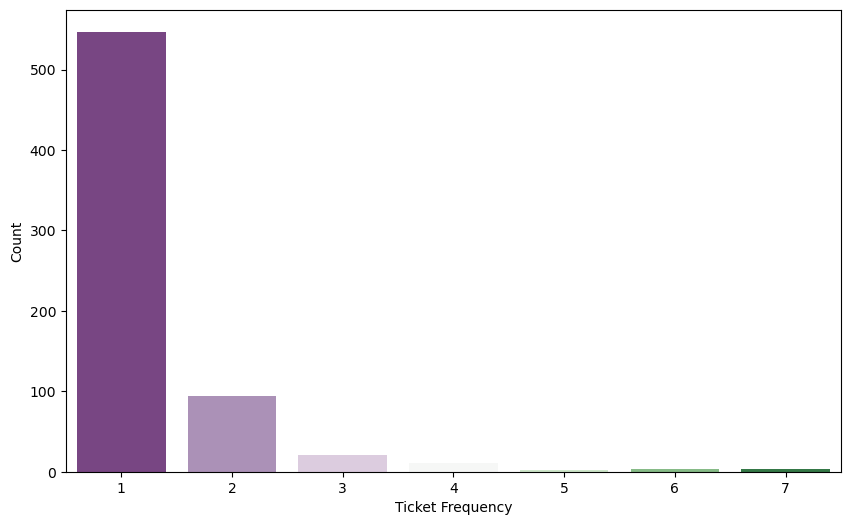

In [115]:
'''35'''
plt.figure(figsize=(10, 6))
sns.barplot(x=ticket_freq_counts.index, y=ticket_freq_counts.values, palette = 'PRGn')

plt.xlabel('Ticket Frequency')
plt.ylabel('Count')
plt.show()

In [116]:
'''36'''
ticket_frequency_train = []

for index, row in df_train.iterrows():
    ticket = row['Ticket']
    frequency = ticket_counts_train[ticket]
    ticket_frequency_train.append(frequency)

df_train['Ticket_Frequency'] = ticket_frequency_train


ticket_frequency_test = []

for index, row in df_test.iterrows():
    ticket = row['Ticket']
    frequency = ticket_counts_test[ticket]
    ticket_frequency_test.append(frequency)

df_test['Ticket_Frequency'] = ticket_frequency_test

In [117]:
'''37'''
for i in range(len(df_train)):
    if df_train['Ticket_Frequency'][i] >= 4:
        df_train['Ticket_Frequency'][i] = 3

for i in range(len(df_test)):
    if df_test['Ticket_Frequency'][i] >= 4:
        df_test['Ticket_Frequency'][i] = 3

In [118]:
'''38'''
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       891 non-null    int64   
 1   Survived          891 non-null    int64   
 2   Pclass            891 non-null    int64   
 3   Name              891 non-null    object  
 4   Age               891 non-null    category
 5   SibSp             891 non-null    int64   
 6   Parch             891 non-null    int64   
 7   Ticket            891 non-null    object  
 8   Fare              891 non-null    category
 9   Sex_female        891 non-null    bool    
 10  Sex_male          891 non-null    bool    
 11  Embarked_C        891 non-null    bool    
 12  Embarked_Q        891 non-null    bool    
 13  Embarked_S        891 non-null    bool    
 14  FamilySize        891 non-null    int64   
 15  Ticket_Frequency  891 non-null    int64   
dtypes: bool(5), category(2), i

In [119]:
'''39'''
# 성능 확인
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'Ticket_Frequency'] 

X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

preds = model_dt.predict(X_test)

submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

submission.to_csv('Family_Ticket_score.csv', index=False)

(891, 12)
(891, 1)
(418, 12)


In [120]:
'''40'''
# 성능 확인
col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Ticket_Frequency'] 

X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

preds = model_dt.predict(X_test)

submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

submission.to_csv('Ticket_score.csv', index=False)

(891, 11)
(891, 1)
(418, 11)


#### * Title 생성

In [121]:
'''41'''
# 3주차 참고
df_train['Title']=""

for i in range(len(df_train['Name'])):
    full_name = df_train['Name'][i]  # 1. 현재 행의 전체 이름

    last_name = full_name.split(',')[1]  # 2. 이름을 콤마(,)로 나눈 후 두 번째 부분
    title = last_name.split('.')[0]      # 3. 두 번째 부분을 점(.)으로 나누고 첫 번째 부분을 추출
    df_train['Title'][i] = title.lower()  # 4. 추출된 호칭을 소문자로 변환하여 'title' 열에 저장합니다.

In [122]:
'''42'''
df_train['Title'].value_counts()

Title
mr              517
miss            182
mrs             125
master           40
dr                7
rev               6
mlle              2
major             2
col               2
the countess      1
capt              1
ms                1
sir               1
lady              1
mme               1
don               1
jonkheer          1
Name: count, dtype: int64

In [123]:
'''43'''
df_test['Title']=""

for i in range(len(df_test['Name'])):
    full_name = df_test['Name'][i]  # 1. 현재 행의 전체 이름

    last_name = full_name.split(',')[1]  # 2. 이름을 콤마(,)로 나눈 후 두 번째 부분
    title = last_name.split('.')[0]      # 3. 두 번째 부분을 점(.)으로 나누고 첫 번째 부분을 추출
    df_test['Title'][i] = title.lower()  # 4. 추출된 호칭을 소문자로 변환하여 'title' 열에 저장합니다.

In [124]:
'''44'''
df_test['Title'].value_counts()

Title
mr        240
miss       78
mrs        72
master     21
col         2
rev         2
ms          1
dr          1
dona        1
Name: count, dtype: int64

In [125]:
'''45'''
df_train.to_csv('df_train_5.csv', index=False)
df_test.to_csv('df_test_5.csv', index=False)

<span style = "color:red"> 
Q3. Title 피쳐는 어떻게 인코딩할 수 있을까요?

In [126]:
### 답
# 여기에 답을 작성하시오.

# 1. 빈도가 잦은 것을 모아 리스트로 만들어보세요.
# 2. 반복문을 돌며 리스트에 없는 것은 etc로 정의하세요.
# 3. get_dummies 활용해 문자를 숫자형태로 인코딩해보세요.

# 1
common_titles = [' mr', ' miss', ' mrs', ' master']

# 2
for i in range(len(df_train) ):  #모든 타이틀을 돌면서
    if df_train.loc[i, 'Title'] not in common_titles:   #타이틀에 대표이름이 없으면
        df_train.loc[i, 'Title'] = 'etc' 


# 3
df_train =pd.get_dummies(df_train, columns=['Title'])
df_test = pd.get_dummies(df_test, columns = ['Title'])



SyntaxError: invalid syntax (3270386722.py, line 1)

In [73]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Ticket_Frequency,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1,False,True,False,False,True,2,1,etc
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,4,True,False,True,False,False,2,1,etc


<span style = "color:red"> 
Q4. 지금까지 나온 피쳐를 조합해서 성능을 높여보세요. (피쳐를 자유롭게 선택해 넣어보세요.)

In [ ]:
### 답
col = [] 

<span style = "color:red"> 
모델에 넣을 피쳐를 col 리스트에 넣고, 성능을 확인해보세요.

In [ ]:
X_train = df_train.loc[:, col]
y_train = df_train[['Survived']]
X_test = df_test.loc[:, col]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 1004)
model_dt.fit(X_train, y_train)

preds = model_dt.predict(X_test)

submission = pd.read_csv('submission.csv')
submission.loc[:, 'Survived'] = preds

submission.to_csv('Ticket_score.csv', index=False)